In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv("/content/advertising.csv")
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [3]:
data_new = data.copy()
data_new.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data_new.describe().round(3)

,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000
mean,147.042,23.264,30.554,15.131
std,85.854,14.847,21.779,5.284
min,0.700,0.000,0.300,1.600
25%,74.375,9.975,12.750,11.000
50%,149.750,22.900,25.750,16.000
75%,218.825,36.525,45.100,19.050
max,296.400,49.600,114.000,27.000


In [5]:
data_new.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [6]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data_new.shape

(200, 4)

In [8]:
x=data_new.drop(['Sales'], axis=1)
y=data_new['Sales']
y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [9]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [11]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [12]:
linear.fit(x_train,y_train)

LinearRegression()

In [13]:
predictions=linear.predict(x_test)
print(predictions)

[21.76459447 16.72099179 18.87362503 21.66827235  5.33039553 14.23860665
 25.11617698 25.11435857  7.82462255  8.2955437  12.61127327 23.89993662
 11.13032358  9.34292247  7.79860588 15.59920384 20.35892044 19.12233537
  9.06744107 19.43307665 13.11535749 19.70495263  8.8634078  15.46288785
 10.08255198 19.05522149 18.22002304 11.18286026 21.33165444  5.25270869
  9.38543917 10.60817381 17.40405878  7.70411639 18.81001559  9.42338217
  9.69732809 17.91516276 20.21389913 18.22069308]


In [14]:
print(r2_score(y_test, predictions))

0.873641447303863


In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.transform(x_test)
linear=LinearRegression()

In [16]:
linear.fit(x_train_trans,y_train)

LinearRegression()

In [17]:
y_predictions=linear.predict(x_test_trans)

In [18]:
print(r2_score(y_test,y_predictions))

0.9368072279602753


In [19]:
from sklearn.svm import SVR
svr=SVR()

In [20]:
svr.fit(x_train,y_train)

SVR()

In [21]:
pred_svr=svr.predict(x_test)
print(pred_svr)

[20.14504474 17.47253135 18.93158039 19.99896463  7.42256726 14.38325051
 21.62864212 21.25273695  8.07097699  9.2890718  13.78259771 20.07631486
 10.663032    9.96626917  8.46363237 14.99386079 19.32377609 19.14657854
 10.52468763 18.51536463 14.46212957 19.14093459  9.85667031 16.2187601
 11.46661845 18.91788292 18.51708212 12.15610093 19.21849306  7.78264903
 10.40280276 11.46071618 17.93032293  8.25179634 18.64736844  9.0656831
  9.49030087 18.02332436 19.91398476 17.61137453]


In [22]:
print(r2_score(y_test, pred_svr))

0.8553005737533992


In [23]:
new_data={'TV':170.9,'Radio':37.6,'Newspaper':77.2}

In [24]:
index=[1]
my_data=pd.DataFrame(new_data,index)
my_data

,TV,Radio,Newspaper
1,170.9,37.6,77.2


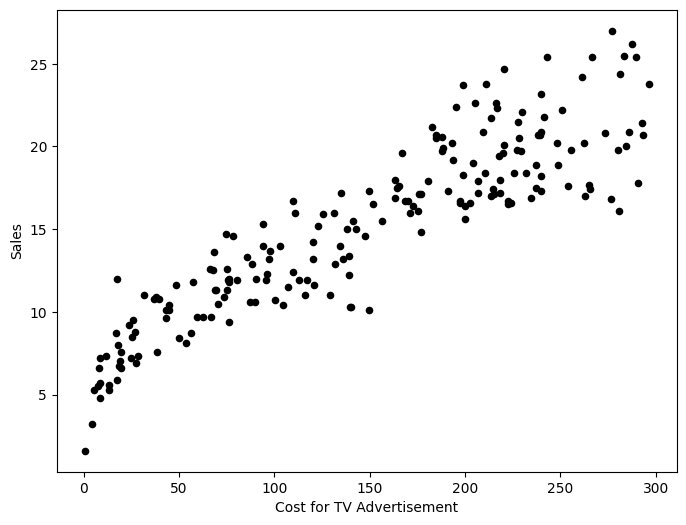

In [25]:
ax=data.plot.scatter(x='TV', y='Sales', figsize=(8,6), color='black')
ax.set_xlabel('Cost for TV Advertisement')
plt.show()

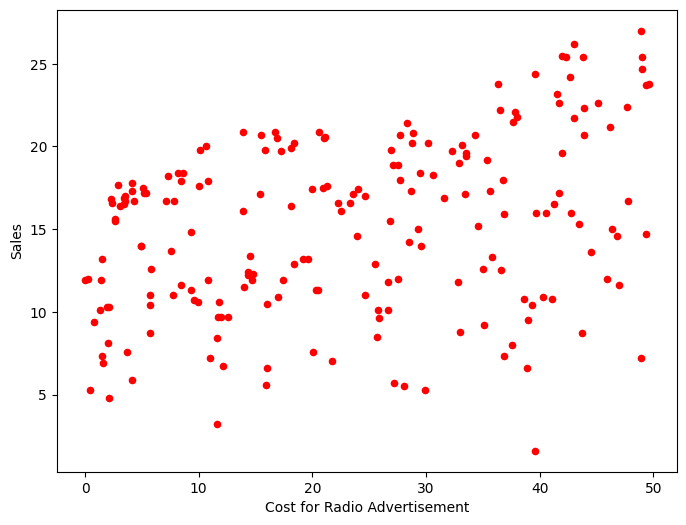

In [26]:
ax=data.plot.scatter(x='Radio', y='Sales', figsize=(8,6), color='red')
ax.set_xlabel('Cost for Radio Advertisement')
plt.show()

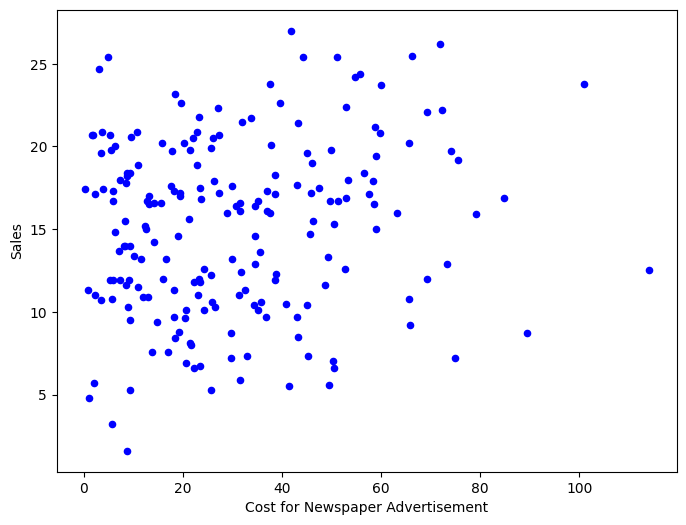

In [27]:
ax=data.plot.scatter(x='Newspaper', y='Sales', figsize=(8,6), color='blue')
ax.set_xlabel('Cost for Newspaper Advertisement')
plt.show()